# Import libraries and read data

In [1]:
import pandas as pd
import numpy as np

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go
from plotly.graph_objects import Bar

init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify

sns.set()

In [2]:
# global data
confirmed_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# U.S. data
confirmed_us_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_us_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

In [3]:
# global data
confirmed_global_df = pd.read_csv(confirmed_global_path)
deaths_global_df = pd.read_csv(deaths_global_path)
recovered_global_df = pd.read_csv(recovered_global_path)

# U.S data
confirmed_us_df = pd.read_csv(confirmed_us_path)
deaths_us_df = pd.read_csv(deaths_us_path)

# Get to know the data:

## Globally confirmed cases:

In [4]:
confirmed_global_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...     349     367     423     444     484   
1        0        0        0  ...     361     377     383     400     409   
2        0        0        0  ...    1320    1423    1468    1572    1666   
3        0        0        0  ...     501     525     545     564     583   
4        0        0        0  ...      14      16      17      19      19   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0      521      555      607      665      714  
1      416      433      446      467      475  
2     1761     1825     1914     1983     2070  
3      601      601      638      646      659  
4       19       19       19       19       19  

[5 rows x 88 columns]

In [5]:
confirmed_global_df.shape

(264, 88)

## Globally deaths:

In [6]:
deaths_global_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...       7      11      14      14      15   
1        0        0        0  ...      20      21      22      22      23   
2        0        0        0  ...     152     173     193     205     235   
3        0        0        0  ...      18      21      22      23      25   
4        0        0        0  ...       2       2       2       2       2   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       15       18       18       21       23  
1       23       23       23       23       24  
2      256      275      293      313      326  
3       26       26       29       29       31  
4        2        2        2        2        2  

[5 rows x 88 columns]

In [7]:
deaths_global_df.shape

(264, 88)

## Globally recovered cases:

In [8]:
recovered_global_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...      15      18      18      29      32   
1        0        0        0  ...     104     116     131     154     165   
2        0        0        0  ...      90      90     113     237     347   
3        0        0        0  ...      26      31      39      52      58   
4        0        0        0  ...       2       2       2       2       2   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       32       32       32       32       40  
1      182      197      217      232      248  
2      405      460      591      601      691  
3       71       71      128      128      128  
4        2        4        4        4        5  

[5 rows x 88 columns]

In [9]:
recovered_global_df.shape

(250, 88)

## U.S. confirmed cases:

In [10]:
confirmed_us_df.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0 -14.2710 -170.1320  ...      0       0       0       0       0        0   
1  13.4443  144.7937  ...    112     113     121     121     128      130   
2  15.0979  145.6739  ...      6       6       6       6       6        6   
3  18.2208  -66.5901  ...    475     513     573     620     683      725   
4  18.3358  -64.8963  ...     42      43      43      45      45       50   

   4/11/20  4/12/20  4/13/20  4/14/20  
0        0        0        0        0  
1      133      133      133      133  
2        6        6        6        6  
3      788      897      903      923  
4       51       51       51       51  

[5 rows x 95 columns]

In [11]:
confirmed_us_df.shape

(3253, 95)

## U.S. deaths:

In [12]:
deaths_us_df.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0 -14.2710 -170.1320  ...      0       0       0       0       0        0   
1  13.4443  144.7937  ...      4       4       4       4       4        4   
2  15.0979  145.6739  ...      1       1       1       1       1        1   
3  18.2208  -66.5901  ...     20      21      23      24      33       39   
4  18.3358  -64.8963  ...      1       1       1       1       1        1   

   4/11/20  4/12/20  4/13/20  4/14/20  
0        0        0        0        0  
1        5        5        5        5  
2        1        1        1        1  
3       42       44       45       45  
4        1        1        1        1  

[5 rows x 96 columns]

In [13]:
deaths_us_df.shape

(3253, 96)

## Summary:

The three datasets share the same structure, and have the same fields, one for **confirmed** cases, one for **deaths** cases, and one for **recovered** cases.
Fields descriptioin
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the *cumulative* number of cases up until this date.

It can be seen that the `U.S.` dataset differs from the `global` one, as it has these additional columns: UID, iso2, iso3, code3, FIPS (we'll get to them later)

# Data Preprocessing:

In [14]:
# global data
print(f'Globally confirmed cases: {confirmed_global_df.shape}')
print(f'Globally deaths: {deaths_global_df.shape}')
print(f'Globally recovered cases: {recovered_global_df.shape}')

# U.S. data
print(f'U.S. Confirmed cases: {confirmed_us_df.shape}')
print(f'U.S. deaths: {deaths_us_df.shape}')

Globally confirmed cases: (264, 88)
Globally deaths: (264, 88)
Globally recovered cases: (250, 88)
U.S. Confirmed cases: (3253, 95)
U.S. deaths: (3253, 96)


although the three datasets have the same structure, they are inconsistent, the number of **recovered** cases is different, so I think we should drop it.

@**Qusai** what do you think? (BTW, no way to mention to other users in jupyter lab, google colab has this feature :|)

## 1 - Drop irrelevant columns:
`Lat` and `Long` columns specify the coordinates of the case, we won't be needing this inofrmation right now.

In [15]:
def drop_irrelevant_columns(df, irrelevant_columns):
    new_df = df.drop(columns=irrelevant_columns)
    return new_df

In [16]:
irrelevant_columns = ['Lat', 'Long']

In [17]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, irrelevant_columns)
deaths_global_df = drop_irrelevant_columns(deaths_global_df, irrelevant_columns)
recovered_global_df = drop_irrelevant_columns(recovered_global_df, irrelevant_columns)

In [18]:
confirmed_global_df.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...     349     367     423     444     484   
1        0        0        0  ...     361     377     383     400     409   
2        0        0        0  ...    1320    1423    1468    1572    1666   
3        0        0        0  ...     501     525     545     564     583   
4        0        0        0  ...      14      16      17      19      19   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0      521      555      607      665      714  
1      416      433      446      467      475  
2     1761     1825     1914     1983     2070  
3      601      601      638      646      659  
4       19       19       19       19       19  

[5 rows x 86 columns]

In [19]:
deaths_global_df.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...       7      11      14      14      15   
1        0        0        0  ...      20      21      22      22      23   
2        0        0        0  ...     152     173     193     205     235   
3        0        0        0  ...      18      21      22      23      25   
4        0        0        0  ...       2       2       2       2       2   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       15       18       18       21       23  
1       23       23       23       23       24  
2      256      275      293      313      326  
3       26       26       29       29       31  
4        2        2        2        2        2  

[5 rows x 86 columns]

In [20]:
recovered_global_df.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...      15      18      18      29      32   
1        0        0        0  ...     104     116     131     154     165   
2        0        0        0  ...      90      90     113     237     347   
3        0        0        0  ...      26      31      39      52      58   
4        0        0        0  ...       2       2       2       2       2   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       32       32       32       32       40  
1      182      197      217      232      248  
2      405      460      591      601      691  
3       71       71      128      128      128  
4        2        4        4        4        5  

[5 rows x 86 columns]

Also, drop columns `UID`, `iso2`, `iso3`, `code3`, `FIPS`, `Admin2`, `Combined_Key` from the `U.S.` data:

In [21]:
irrelevant_columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key']

In [22]:
confirmed_us_df = drop_irrelevant_columns(confirmed_us_df, irrelevant_columns)
deaths_us_df = drop_irrelevant_columns(deaths_us_df, irrelevant_columns)

In [23]:
confirmed_us_df.head()

Province_State Country_Region  1/22/20  1/23/20  1/24/20  \
0            American Samoa             US        0        0        0   
1                      Guam             US        0        0        0   
2  Northern Mariana Islands             US        0        0        0   
3               Puerto Rico             US        0        0        0   
4            Virgin Islands             US        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  ...  4/5/20  4/6/20  4/7/20  \
0        0        0        0        0        0  ...       0       0       0   
1        0        0        0        0        0  ...     112     113     121   
2        0        0        0        0        0  ...       6       6       6   
3        0        0        0        0        0  ...     475     513     573   
4        0        0        0        0        0  ...      42      43      43   

   4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       0       0        0        0        0        0        0  
1     121     128      130      133      133      133      133  
2       6       6        6        6        6        6        6  
3     620     683      725      788      897      903      923  
4      45      45       50       51       51       51       51  

[5 rows x 86 columns]

In [24]:
deaths_us_df.head()

Province_State Country_Region  Population  1/22/20  1/23/20  \
0            American Samoa             US       55641        0        0   
1                      Guam             US      164229        0        0   
2  Northern Mariana Islands             US       55144        0        0   
3               Puerto Rico             US     2933408        0        0   
4            Virgin Islands             US      107268        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  ...  4/5/20  4/6/20  4/7/20  \
0        0        0        0        0        0  ...       0       0       0   
1        0        0        0        0        0  ...       4       4       4   
2        0        0        0        0        0  ...       1       1       1   
3        0        0        0        0        0  ...      20      21      23   
4        0        0        0        0        0  ...       1       1       1   

   4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       0       0        0        0        0        0        0  
1       4       4        4        5        5        5        5  
2       1       1        1        1        1        1        1  
3      24      33       39       42       44       45       45  
4       1       1        1        1        1        1        1  

[5 rows x 87 columns]

only deaths data has the column `Population`, but it should the same for the confirmed data also.

In [25]:
confirmed_us_df.insert(2, 'Population', deaths_us_df['Population'])

In [26]:
confirmed_us_df.head()

Province_State Country_Region  Population  1/22/20  1/23/20  \
0            American Samoa             US       55641        0        0   
1                      Guam             US      164229        0        0   
2  Northern Mariana Islands             US       55144        0        0   
3               Puerto Rico             US     2933408        0        0   
4            Virgin Islands             US      107268        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  ...  4/5/20  4/6/20  4/7/20  \
0        0        0        0        0        0  ...       0       0       0   
1        0        0        0        0        0  ...     112     113     121   
2        0        0        0        0        0  ...       6       6       6   
3        0        0        0        0        0  ...     475     513     573   
4        0        0        0        0        0  ...      42      43      43   

   4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       0       0        0        0        0        0        0  
1     121     128      130      133      133      133      133  
2       6       6        6        6        6        6        6  
3     620     683      725      788      897      903      923  
4      45      45       50       51       51       51       51  

[5 rows x 87 columns]

## 2 - Normalize columns' names:
throughout this notebook, we will be quering columns `Province/State`, `Country/Region` a lot! so it would be better to rename them so some thing like `State` and `Country` respectively.

In [27]:
def rename_columns(df, columns_mapping):
    new_df = df.rename(columns=columns_mapping)
    return new_df

In [28]:
columns_mapping = {
    'Province/State': 'State',
    'Province_State': 'State',
    'Country/Region': 'Country',
    'Country_Region': 'Country'
}

In [29]:
# global data
confirmed_global_df = rename_columns(confirmed_global_df, columns_mapping)
deaths_global_df = rename_columns(deaths_global_df, columns_mapping)
recovered_global_df = rename_columns(recovered_global_df, columns_mapping)

# U.S. data
confirmed_us_df = rename_columns(confirmed_us_df, columns_mapping)
deaths_us_df = rename_columns(deaths_us_df, columns_mapping)

### Global data:

In [30]:
confirmed_global_df.head()

State      Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0   NaN  Afghanistan        0        0        0        0        0        0   
1   NaN      Albania        0        0        0        0        0        0   
2   NaN      Algeria        0        0        0        0        0        0   
3   NaN      Andorra        0        0        0        0        0        0   
4   NaN       Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0        0        0  ...     349     367     423     444     484      521   
1        0        0  ...     361     377     383     400     409      416   
2        0        0  ...    1320    1423    1468    1572    1666     1761   
3        0        0  ...     501     525     545     564     583      601   
4        0        0  ...      14      16      17      19      19       19   

   4/11/20  4/12/20  4/13/20  4/14/20  
0      555      607      665      714  
1      433      446      467      475  
2     1825     1914     1983     2070  
3      601      638      646      659  
4       19       19       19       19  

[5 rows x 86 columns]

In [31]:
deaths_global_df.head()

State      Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0   NaN  Afghanistan        0        0        0        0        0        0   
1   NaN      Albania        0        0        0        0        0        0   
2   NaN      Algeria        0        0        0        0        0        0   
3   NaN      Andorra        0        0        0        0        0        0   
4   NaN       Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0        0        0  ...       7      11      14      14      15       15   
1        0        0  ...      20      21      22      22      23       23   
2        0        0  ...     152     173     193     205     235      256   
3        0        0  ...      18      21      22      23      25       26   
4        0        0  ...       2       2       2       2       2        2   

   4/11/20  4/12/20  4/13/20  4/14/20  
0       18       18       21       23  
1       23       23       23       24  
2      275      293      313      326  
3       26       29       29       31  
4        2        2        2        2  

[5 rows x 86 columns]

In [32]:
recovered_global_df.head()

State      Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0   NaN  Afghanistan        0        0        0        0        0        0   
1   NaN      Albania        0        0        0        0        0        0   
2   NaN      Algeria        0        0        0        0        0        0   
3   NaN      Andorra        0        0        0        0        0        0   
4   NaN       Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0        0        0  ...      15      18      18      29      32       32   
1        0        0  ...     104     116     131     154     165      182   
2        0        0  ...      90      90     113     237     347      405   
3        0        0  ...      26      31      39      52      58       71   
4        0        0  ...       2       2       2       2       2        2   

   4/11/20  4/12/20  4/13/20  4/14/20  
0       32       32       32       40  
1      197      217      232      248  
2      460      591      601      691  
3       71      128      128      128  
4        4        4        4        5  

[5 rows x 86 columns]

### U.S. data:

In [33]:
confirmed_us_df.head()

State Country  Population  1/22/20  1/23/20  1/24/20  \
0            American Samoa      US       55641        0        0        0   
1                      Guam      US      164229        0        0        0   
2  Northern Mariana Islands      US       55144        0        0        0   
3               Puerto Rico      US     2933408        0        0        0   
4            Virgin Islands      US      107268        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  \
0        0        0        0        0  ...       0       0       0       0   
1        0        0        0        0  ...     112     113     121     121   
2        0        0        0        0  ...       6       6       6       6   
3        0        0        0        0  ...     475     513     573     620   
4        0        0        0        0  ...      42      43      43      45   

   4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       0        0        0        0        0        0  
1     128      130      133      133      133      133  
2       6        6        6        6        6        6  
3     683      725      788      897      903      923  
4      45       50       51       51       51       51  

[5 rows x 87 columns]

In [34]:
deaths_us_df.head()

State Country  Population  1/22/20  1/23/20  1/24/20  \
0            American Samoa      US       55641        0        0        0   
1                      Guam      US      164229        0        0        0   
2  Northern Mariana Islands      US       55144        0        0        0   
3               Puerto Rico      US     2933408        0        0        0   
4            Virgin Islands      US      107268        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  \
0        0        0        0        0  ...       0       0       0       0   
1        0        0        0        0  ...       4       4       4       4   
2        0        0        0        0  ...       1       1       1       1   
3        0        0        0        0  ...      20      21      23      24   
4        0        0        0        0  ...       1       1       1       1   

   4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       0        0        0        0        0        0  
1       4        4        5        5        5        5  
2       1        1        1        1        1        1  
3      33       39       42       44       45       45  
4       1        1        1        1        1        1  

[5 rows x 87 columns]

## 3 - Drop `State` column from the global data:
most records of the global data doesn't have `State` value, so it's better to drop it.

In [35]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, 'State')
deaths_global_df = drop_irrelevant_columns(deaths_global_df, 'State')
recovered_global_df = drop_irrelevant_columns(recovered_global_df, 'State')

In [36]:
confirmed_global_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0        0        0  ...     349     367     423     444     484      521   
1        0        0  ...     361     377     383     400     409      416   
2        0        0  ...    1320    1423    1468    1572    1666     1761   
3        0        0  ...     501     525     545     564     583      601   
4        0        0  ...      14      16      17      19      19       19   

   4/11/20  4/12/20  4/13/20  4/14/20  
0      555      607      665      714  
1      433      446      467      475  
2     1825     1914     1983     2070  
3      601      638      646      659  
4       19       19       19       19  

[5 rows x 85 columns]

In [37]:
deaths_global_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0        0        0  ...       7      11      14      14      15       15   
1        0        0  ...      20      21      22      22      23       23   
2        0        0  ...     152     173     193     205     235      256   
3        0        0  ...      18      21      22      23      25       26   
4        0        0  ...       2       2       2       2       2        2   

   4/11/20  4/12/20  4/13/20  4/14/20  
0       18       18       21       23  
1       23       23       23       24  
2      275      293      313      326  
3       26       29       29       31  
4        2        2        2        2  

[5 rows x 85 columns]

In [38]:
recovered_global_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0        0        0  ...      15      18      18      29      32       32   
1        0        0  ...     104     116     131     154     165      182   
2        0        0  ...      90      90     113     237     347      405   
3        0        0  ...      26      31      39      52      58       71   
4        0        0  ...       2       2       2       2       2        2   

   4/11/20  4/12/20  4/13/20  4/14/20  
0       32       32       32       40  
1      197      217      232      248  
2      460      591      601      691  
3       71      128      128      128  
4        4        4        4        5  

[5 rows x 85 columns]

## 4 - Aggregate data by countries for global data:
aggregate the number of confirmed cases, number of deaths, and number of reovered cases at each day for each country.

aggregate global data:

In [39]:
def apply_aggregation(df, by_column):
    aggregate_df = df.groupby(by=by_column)\
                        .sum()\
                        .reset_index()
    return aggregate_df

In [40]:
by_column = 'Country'

In [41]:
# global
confirmed_global_agg_df = apply_aggregation(confirmed_global_df, by_column)
deaths_global_agg_df = apply_aggregation(deaths_global_df, by_column)
recovered_global_agg_df = apply_aggregation(recovered_global_df, by_column)
# TODO:
# aggregate the U.S. data by `state`
# confirmed_us_agg_df = apply_aggregation(confirmed_us_df, by_column)
# deaths_us_agg_df = apply_aggregation(deaths_us_df, by_column)

In [42]:
confirmed_global_agg_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0        0        0  ...     349     367     423     444     484      521   
1        0        0  ...     361     377     383     400     409      416   
2        0        0  ...    1320    1423    1468    1572    1666     1761   
3        0        0  ...     501     525     545     564     583      601   
4        0        0  ...      14      16      17      19      19       19   

   4/11/20  4/12/20  4/13/20  4/14/20  
0      555      607      665      714  
1      433      446      467      475  
2     1825     1914     1983     2070  
3      601      638      646      659  
4       19       19       19       19  

[5 rows x 85 columns]

In [43]:
deaths_global_agg_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0        0        0  ...       7      11      14      14      15       15   
1        0        0  ...      20      21      22      22      23       23   
2        0        0  ...     152     173     193     205     235      256   
3        0        0  ...      18      21      22      23      25       26   
4        0        0  ...       2       2       2       2       2        2   

   4/11/20  4/12/20  4/13/20  4/14/20  
0       18       18       21       23  
1       23       23       23       24  
2      275      293      313      326  
3       26       29       29       31  
4        2        2        2        2  

[5 rows x 85 columns]

In [44]:
recovered_global_agg_df.head()

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0  Afghanistan        0        0        0        0        0        0        0   
1      Albania        0        0        0        0        0        0        0   
2      Algeria        0        0        0        0        0        0        0   
3      Andorra        0        0        0        0        0        0        0   
4       Angola        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0        0        0  ...      15      18      18      29      32       32   
1        0        0  ...     104     116     131     154     165      182   
2        0        0  ...      90      90     113     237     347      405   
3        0        0  ...      26      31      39      52      58       71   
4        0        0  ...       2       2       2       2       2        2   

   4/11/20  4/12/20  4/13/20  4/14/20  
0       32       32       32       40  
1      197      217      232      248  
2      460      591      601      691  
3       71      128      128      128  
4        4        4        4        5  

[5 rows x 85 columns]

aggregate U.S. data:

In [45]:
by_columns = ['Country', 'State']

In [46]:
confirmed_us_agg_df = apply_aggregation(confirmed_us_df, by_columns)
deaths_us_agg_df = apply_aggregation(deaths_us_df, by_columns)

In [47]:
confirmed_us_agg_df.head()

Country           State  Population  1/22/20  1/23/20  1/24/20  1/25/20  \
0      US         Alabama     4903185        0        0        0        0   
1      US          Alaska      731545        0        0        0        0   
2      US  American Samoa       55641        0        0        0        0   
3      US         Arizona     7278717        0        0        0        0   
4      US        Arkansas     3017804        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...    1765    1952    2169    2328    2703   
1        0        0        0  ...     185     190     213     226     235   
2        0        0        0  ...       0       0       0       0       0   
3        1        1        1  ...    2486    2732    2870    3036    3018   
4        0        0        0  ...     837     875     946    1000    1119   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0     2947     3217     3563     3734     3953  
1      246      257      272      277      285  
2        0        0        0        0        0  
3     3112     3393     3542     3705     3809  
4     1171     1228     1280     1410     1498  

[5 rows x 87 columns]

In [48]:
deaths_us_agg_df.head()

Country           State  Population  1/22/20  1/23/20  1/24/20  1/25/20  \
0      US         Alabama     4903185        0        0        0        0   
1      US          Alaska      731545        0        0        0        0   
2      US  American Samoa       55641        0        0        0        0   
3      US         Arizona     7278717        0        0        0        0   
4      US        Arkansas     3017804        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...      45      49      64      66      70   
1        0        0        0  ...       6       6       6       7       7   
2        0        0        0  ...       0       0       0       0       0   
3        0        0        0  ...      64      65      73      80      89   
4        0        0        0  ...      16      16      18      18      21   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       80       92       93       99      114  
1        7        8        8        8        9  
2        0        0        0        0        0  
3       97      108      115      122      131  
4       21       25       27       29       32  

[5 rows x 87 columns]

## 5 - create `Population` dataframe for the `U.S.` data:

Later, we will convert the data to time series structure, and the value of `Population` shouldn't be in a time series data, as it doesn't change over time, it's rather a characteristic of the state.

In [49]:
us_population_df = confirmed_us_agg_df[['Country', 'State', 'Population']]

In [50]:
confirmed_us_agg_df = drop_irrelevant_columns(confirmed_us_agg_df, ['Population'])
deaths_us_agg_df = drop_irrelevant_columns(deaths_us_agg_df, ['Population'])

In [51]:
confirmed_us_agg_df.head()

Country           State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0      US         Alabama        0        0        0        0        0   
1      US          Alaska        0        0        0        0        0   
2      US  American Samoa        0        0        0        0        0   
3      US         Arizona        0        0        0        0        1   
4      US        Arkansas        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...    1765    1952    2169    2328    2703   
1        0        0        0  ...     185     190     213     226     235   
2        0        0        0  ...       0       0       0       0       0   
3        1        1        1  ...    2486    2732    2870    3036    3018   
4        0        0        0  ...     837     875     946    1000    1119   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0     2947     3217     3563     3734     3953  
1      246      257      272      277      285  
2        0        0        0        0        0  
3     3112     3393     3542     3705     3809  
4     1171     1228     1280     1410     1498  

[5 rows x 86 columns]

In [52]:
deaths_us_agg_df.head()

Country           State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0      US         Alabama        0        0        0        0        0   
1      US          Alaska        0        0        0        0        0   
2      US  American Samoa        0        0        0        0        0   
3      US         Arizona        0        0        0        0        0   
4      US        Arkansas        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  \
0        0        0        0  ...      45      49      64      66      70   
1        0        0        0  ...       6       6       6       7       7   
2        0        0        0  ...       0       0       0       0       0   
3        0        0        0  ...      64      65      73      80      89   
4        0        0        0  ...      16      16      18      18      21   

   4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  
0       80       92       93       99      114  
1        7        8        8        8        9  
2        0        0        0        0        0  
3       97      108      115      122      131  
4       21       25       27       29       32  

[5 rows x 86 columns]

## 5 - Restructe the Data:
convert the data into an easier structure, add column `date`, and change the columns to br rows (for easier manipulation)

In [53]:
date_columns = confirmed_global_agg_df.filter(regex='\d{1,2}/\d{1,2}/\d{1,4}').columns.values

In [54]:
def construct_date_df(df, date_column_name, copy_columns, value_column_name):
    
    data = {}
    
    data['date'] = date_column_name
    
    for column in copy_columns:
        data[column] = df[column]
    
    data[value_column_name] = df[date_column_name]
    
    date_df = pd.DataFrame(data=data)
    
    return date_df

In [55]:
# global data
confirmed_global_date_frames = [construct_date_df(confirmed_global_agg_df, date_column, ['Country'], 'confirmed') for date_column in date_columns]
deaths_global_date_frames = [construct_date_df(deaths_global_agg_df, date_column, ['Country'], 'deaths') for date_column in date_columns]
recovered_global_date_frames = [construct_date_df(recovered_global_agg_df, date_column, ['Country'], 'recovered') for date_column in date_columns]

# U.S. data
confirmed_us_date_frames = [construct_date_df(confirmed_us_agg_df, date_column, ['Country', 'State'], 'confirmed') for date_column in date_columns]
deaths_us_date_frames = [construct_date_df(deaths_us_agg_df, date_column, ['Country', 'State'], 'deaths') for date_column in date_columns]

In [56]:
# global data
confirmed_global_time_series = pd.concat(confirmed_global_date_frames)
deaths_global_time_series = pd.concat(deaths_global_date_frames)
recovered_global_time_series = pd.concat(recovered_global_date_frames)

# U.S. data
confirmed_us_time_series = pd.concat(confirmed_us_date_frames)
deaths_us_time_series = pd.concat(deaths_us_date_frames)

In [57]:
confirmed_global_time_series.head()

date      Country  confirmed
0  1/22/20  Afghanistan          0
1  1/22/20      Albania          0
2  1/22/20      Algeria          0
3  1/22/20      Andorra          0
4  1/22/20       Angola          0

In [58]:
deaths_global_time_series.head()

date      Country  deaths
0  1/22/20  Afghanistan       0
1  1/22/20      Albania       0
2  1/22/20      Algeria       0
3  1/22/20      Andorra       0
4  1/22/20       Angola       0

In [59]:
recovered_global_time_series.head()

date      Country  recovered
0  1/22/20  Afghanistan          0
1  1/22/20      Albania          0
2  1/22/20      Algeria          0
3  1/22/20      Andorra          0
4  1/22/20       Angola          0

In [60]:
confirmed_us_time_series.head()

date Country           State  confirmed
0  1/22/20      US         Alabama          0
1  1/22/20      US          Alaska          0
2  1/22/20      US  American Samoa          0
3  1/22/20      US         Arizona          0
4  1/22/20      US        Arkansas          0

In [61]:
deaths_us_time_series.head()

date Country           State  deaths
0  1/22/20      US         Alabama       0
1  1/22/20      US          Alaska       0
2  1/22/20      US  American Samoa       0
3  1/22/20      US         Arizona       0
4  1/22/20      US        Arkansas       0

in the rest of the notebook, we will focus on the following three dataframes:
- `confirmed_time_series`: time series of the confirmed cases.
- `deaths_time_series`: time series of the deaths.
- `recovered_time_series`: time series of the recovered cases.

A *time series* data shows the change in a *statiscal variable* according to *time*.<br>
Each row in the previous time series is a tuple of date, country, and measure, the measure represents the cumulative sum in the country, up until the date.

## 6 - Focus on *Outbreaks*:
We will focus in this notebook only on countries with high **death tolls**, countires that are nearly affected by the pandemic will be discarded.

In [62]:
last_day = deaths_global_time_series['date'].values[-1]

In [63]:
most_affected_countries = deaths_global_time_series[deaths_global_time_series['date'] == last_day]\
                                                                            .sort_values(by='deaths', ascending=False)\
                                                                            [:10]

In [64]:
most_affected_countries

date         Country  deaths
171  4/14/20              US   25832
84   4/14/20           Italy   21067
156  4/14/20           Spain   18056
61   4/14/20          France   15748
175  4/14/20  United Kingdom   12129
80   4/14/20            Iran    4683
16   4/14/20         Belgium    4157
36   4/14/20           China    3345
65   4/14/20         Germany    3294
120  4/14/20     Netherlands    2955

In [65]:
blues = sns.color_palette('Blues', 10)
blues.reverse()

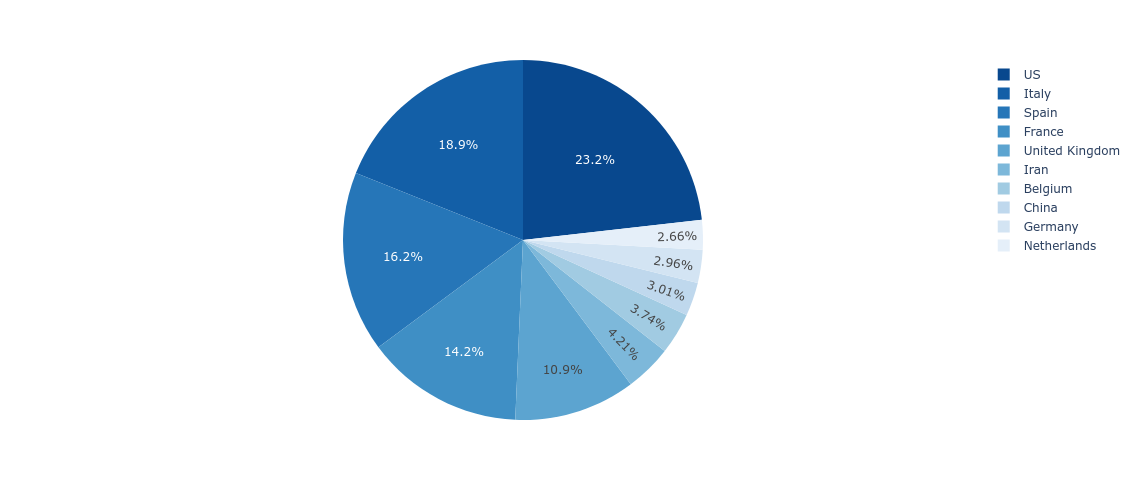

In [66]:
fig = px.pie(data_frame=most_affected_countries, values='deaths', names='Country', color_discrete_sequence=blues.as_hex(), width=600, height=500)
fig.show()

In [67]:
print(plotly.offline.plot(figure_or_data=fig, output_type='div', include_plotlyjs='cdn'))

<div>
        
                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>    
            <div id="b168ecf2-94cb-473c-9a2e-064bd497486f" class="plotly-graph-div" style="height:500px; width:600px;"></div>
            <script type="text/javascript">
                
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    
                if (document.getElementById("b168ecf2-94cb-473c-9a2e-064bd497486f")) {
                    Plotly.newPlot(
                        'b168ecf2-94cb-473c-9a2e-064bd497486f',
                        [{"domain": {"x": [0.0, 1.0], "y": [0.0, 1.0]}, "hoverlabel": {"namelength": 0}, "hovertemplate": "Country=%{label}<br>deaths=%{value}", "labels": ["US", "Italy", "Spain", "France", "United Kingdom", "Iran", "Belgium", "China", "Germany", "Netherlands"], "legendgroup": "", "name": "", "showlegend": true, "type": "pie", "va

In [68]:
fig.write_html(file='assets/most_affected_countries-pie_chart.html', include_plotlyjs='cdn')

In [69]:
most_affected_countries_names = most_affected_countries['Country'].values

Create time series for most affected countries:

In [70]:
most_deaths_time_series = deaths_global_time_series[deaths_global_time_series['Country'].isin(most_affected_countries_names)]

In [71]:
most_deaths_time_series.head()

date  Country  deaths
16  1/22/20  Belgium       0
36  1/22/20    China      17
61  1/22/20   France       0
65  1/22/20  Germany       0
80  1/22/20     Iran       0

In [72]:
most_confirmed_time_series = confirmed_global_time_series[confirmed_global_time_series['Country'].isin(most_affected_countries_names)]

In [73]:
most_confirmed_time_series.head()

date  Country  confirmed
16  1/22/20  Belgium          0
36  1/22/20    China        548
61  1/22/20   France          0
65  1/22/20  Germany          0
80  1/22/20     Iran          0

In [74]:
most_recovered_time_series = recovered_global_time_series[recovered_global_time_series['Country'].isin(most_affected_countries_names)]

In [75]:
most_recovered_time_series.head()

date  Country  recovered
16  1/22/20  Belgium          0
36  1/22/20    China         28
61  1/22/20   France          0
65  1/22/20  Germany          0
80  1/22/20     Iran          0

In [76]:
most_recovered_time_series['date'] = pd.to_datetime(most_recovered_time_series['date'], utc=False)

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [77]:
most_recovered_time_series.sort_values(by='date', inplace=True)

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [78]:
most_recovered_time_series.head()

date  Country  recovered
16 2020-01-22  Belgium          0
36 2020-01-22    China         28
61 2020-01-22   France          0
65 2020-01-22  Germany          0
80 2020-01-22     Iran          0

# Data Visualization:

## First infection date

In [79]:
most_confirmed_time_series['date'] = pd.to_datetime(most_confirmed_time_series['date'], utc=False)

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [80]:
most_confirmed_time_series.sort_values(by='date', inplace=True)

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [81]:
most_confirmed_time_series.head()

date  Country  confirmed
16 2020-01-22  Belgium          0
36 2020-01-22    China        548
61 2020-01-22   France          0
65 2020-01-22  Germany          0
80 2020-01-22     Iran          0

In [82]:
first_infection_date_df = most_confirmed_time_series[most_confirmed_time_series['confirmed'] > 0]\
                                                    .groupby('Country')\
                                                    .first()\
                                                    .reset_index()\
                                                    .sort_values(by='date')

In [83]:
first_infection_date_df.head()

Country       date  confirmed
1    China 2020-01-22        548
8       US 2020-01-22          1
2   France 2020-01-24          2
3  Germany 2020-01-27          1
5    Italy 2020-01-31          2

In [84]:
first_infection_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .format({'date': "{:%Y-%m-%d}"})\
                        .hide_index()

In [85]:
html_string = first_infection_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .format({'date': "{:%Y-%m-%d}"})\
                        .hide_index()\
                        .render()

In [86]:
with open('assets/first_infection_date_table.html', 'w') as html_file:
    html_file.write(html_string)

## First death date

In [87]:
most_deaths_time_series['date'] = pd.to_datetime(most_deaths_time_series['date'], utc=False)

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [88]:
most_deaths_time_series.sort_values(by='date', inplace=True)

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [89]:
most_deaths_time_series.head()

date  Country  deaths
16 2020-01-22  Belgium       0
36 2020-01-22    China      17
61 2020-01-22   France       0
65 2020-01-22  Germany       0
80 2020-01-22     Iran       0

In [90]:
first_death_date_df = most_deaths_time_series[most_deaths_time_series['deaths'] > 0]\
                                                .groupby(by='Country')\
                                                .first()\
                                                .reset_index()\
                                                .sort_values(by='date')

In [91]:
first_death_date_df.head()

Country       date  deaths
1   China 2020-01-22      17
2  France 2020-02-15       1
4    Iran 2020-02-19       2
5   Italy 2020-02-21       1
8      US 2020-02-29       1

In [92]:
first_death_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .format({'date': "{:%Y-%m-%d}"})\
                        .hide_index()

In [93]:
html_string = first_death_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .format({'date': "{:%Y-%m-%d}"})\
                        .hide_index()\
                        .render()

In [94]:
with open('assets/first_death_date_table.html', 'w') as html_file:
    html_file.write(html_string)

## Line Chart:

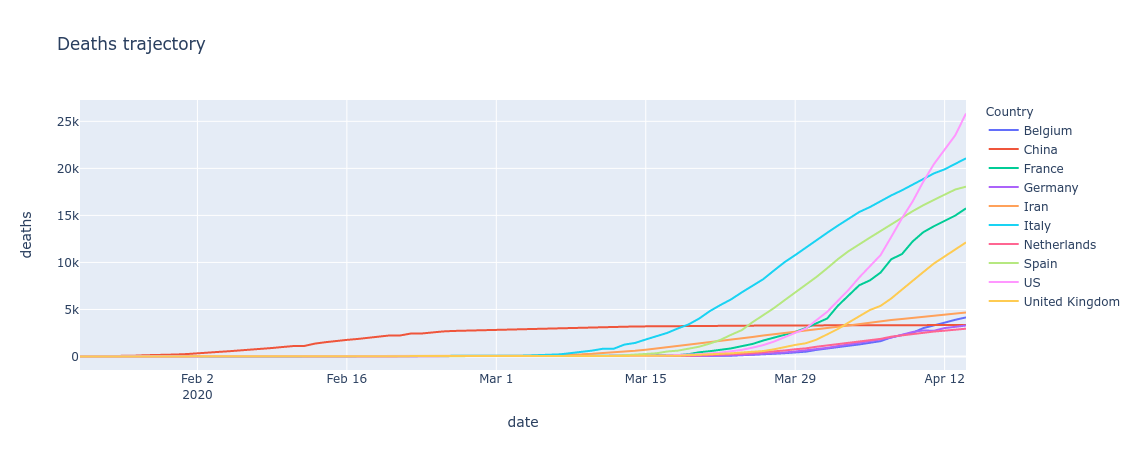

In [95]:
fig = px.line(data_frame=most_deaths_time_series, x='date', y='deaths', color='Country',
              line_group='Country', title='Deaths trajectory')
fig.show()

In [96]:
# fig.write_html(file='assets/deaths_time_series.html', include_plotlyjs='cdn')
print(plotly.offline.plot(figure_or_data=fig, output_type='div', include_plotlyjs='cdn'))

<div>
        
                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>    
            <div id="85f2864b-b2a5-4685-a8d2-118b589f46c7" class="plotly-graph-div" style="height:100%; width:100%;"></div>
            <script type="text/javascript">
                
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    
                if (document.getElementById("85f2864b-b2a5-4685-a8d2-118b589f46c7")) {
                    Plotly.newPlot(
                        '85f2864b-b2a5-4685-a8d2-118b589f46c7',
                        [{"hoverlabel": {"namelength": 0}, "hovertemplate": "Country=Belgium<br>date=%{x}<br>deaths=%{y}", "legendgroup": "Belgium", "line": {"color": "#636efa", "dash": "solid"}, "mode": "lines", "name": "Belgium", "showlegend": true, "type": "scatter", "x": ["2020-01-22T00:00:00", "2020-01-23T00:00:00", "2020-01-24T00:00:00", "202

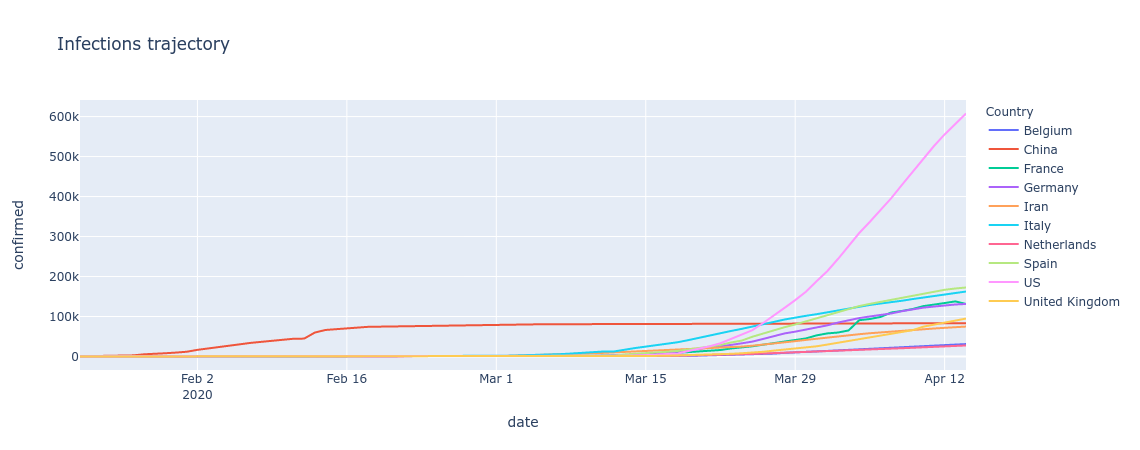

In [97]:
fig = px.line(data_frame=most_confirmed_time_series, x='date', y='confirmed', color='Country',
              line_group='Country', title='Infections trajectory')
fig.show()

In [98]:
# fig.write_html(file='assets/confirmed_time_series.html', include_plotlyjs='cdn')
print(plotly.offline.plot(figure_or_data=fig, output_type='div', include_plotlyjs='cdn'))

<div>
        
                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>    
            <div id="350b44c7-fba1-4b42-80d7-b2eb69807518" class="plotly-graph-div" style="height:100%; width:100%;"></div>
            <script type="text/javascript">
                
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    
                if (document.getElementById("350b44c7-fba1-4b42-80d7-b2eb69807518")) {
                    Plotly.newPlot(
                        '350b44c7-fba1-4b42-80d7-b2eb69807518',
                        [{"hoverlabel": {"namelength": 0}, "hovertemplate": "Country=Belgium<br>date=%{x}<br>confirmed=%{y}", "legendgroup": "Belgium", "line": {"color": "#636efa", "dash": "solid"}, "mode": "lines", "name": "Belgium", "showlegend": true, "type": "scatter", "x": ["2020-01-22T00:00:00", "2020-01-23T00:00:00", "2020-01-24T00:00:00", "

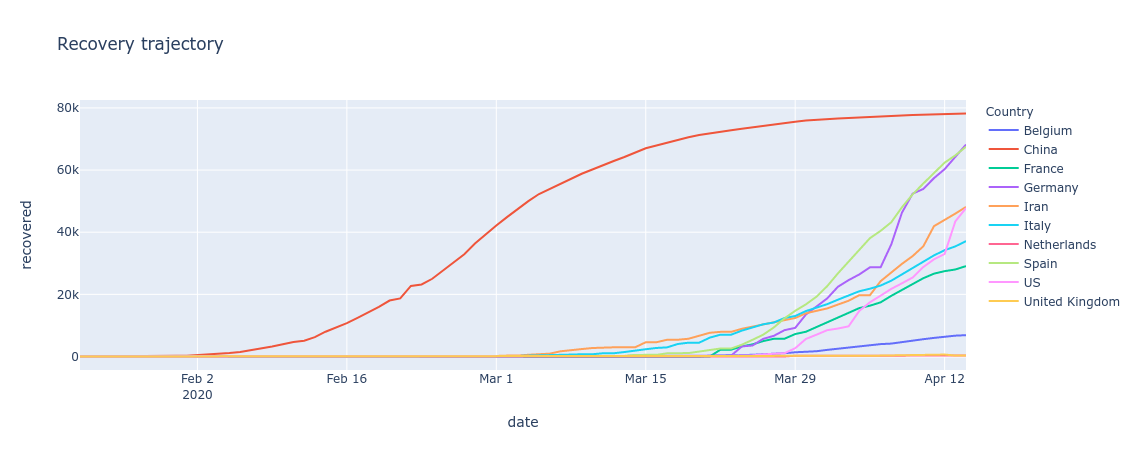

In [99]:
fig = px.line(data_frame=most_recovered_time_series, x='date', y='recovered', color='Country', line_group='Country', title='Recovery trajectory')
fig.show()

In [100]:
# fig.write_html(file='assets/recovered_time_series.html', include_plotlyjs='cdn')
print(plotly.offline.plot(figure_or_data=fig, output_type='div', include_plotlyjs='cdn'))

<div>
        
                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>    
            <div id="3e30434a-850a-49c5-8e7b-b4ede152233b" class="plotly-graph-div" style="height:100%; width:100%;"></div>
            <script type="text/javascript">
                
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    
                if (document.getElementById("3e30434a-850a-49c5-8e7b-b4ede152233b")) {
                    Plotly.newPlot(
                        '3e30434a-850a-49c5-8e7b-b4ede152233b',
                        [{"hoverlabel": {"namelength": 0}, "hovertemplate": "Country=Belgium<br>date=%{x}<br>recovered=%{y}", "legendgroup": "Belgium", "line": {"color": "#636efa", "dash": "solid"}, "mode": "lines", "name": "Belgium", "showlegend": true, "type": "scatter", "x": ["2020-01-22T00:00:00", "2020-01-23T00:00:00", "2020-01-24T00:00:00", "

`TODO`:
- investigate the date of the lockdown applied by each country, and study how it affected the growth of cases (in general)
- try to model the grow of countries by *Mathematical functions*, China for example is like the `sigmoid` function, while other counter countries like Italy, Spain, ... are more like `exponential` function (good resource for this: [Estimating actual COVID 19 cases (novel corona virus infections) in an area based on deaths](https://www.youtube.com/watch?v=mCa0JXEwDEk))

## Choropleth Map:

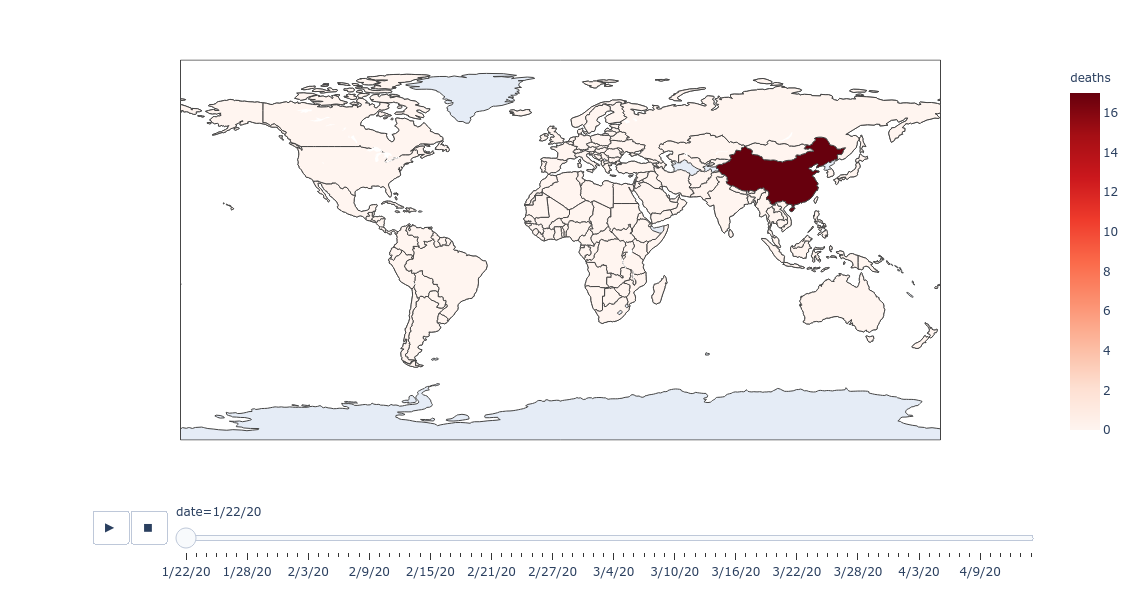

In [101]:
fig = px.choropleth(data_frame=deaths_global_time_series, locations='Country',
                    locationmode='country names', color='deaths',
                    hover_name='deaths', animation_frame='date',
                    color_continuous_scale=px.colors.sequential.Reds,
                    width=1000, height=600)
fig.show()

In [102]:
with open('assets/deaths_choropleth_map.html', 'w') as html_file:
    html_file.write(plotly.offline.plot(figure_or_data=fig, output_type='div', include_plotlyjs='cdn', auto_play=False))

## U.S. Choropleth:

In [103]:
# lookup_df = pd.read_csv('COVID-19/csse_covid_19_data/us_states_abbrevations.csv')

In [104]:
# lookup_df.head()

In [105]:
# confirmed_us_time_series.head()

In [106]:
# temp_df = confirmed_us_time_series.merge(lookup_df[['State', 'Code']],
#                                 left_on='State',
#                                 right_on='State',
#                                 how='inner')

In [107]:
# temp_df.head()

In [108]:
# fig = px.choropleth(data_frame=temp_df,
#                     locations='Code',
#                     locationmode="USA-states",
#                     color='confirmed',
#                     animation_frame='date',
#                     scope="usa")
# fig.show()

## Bubble Map:

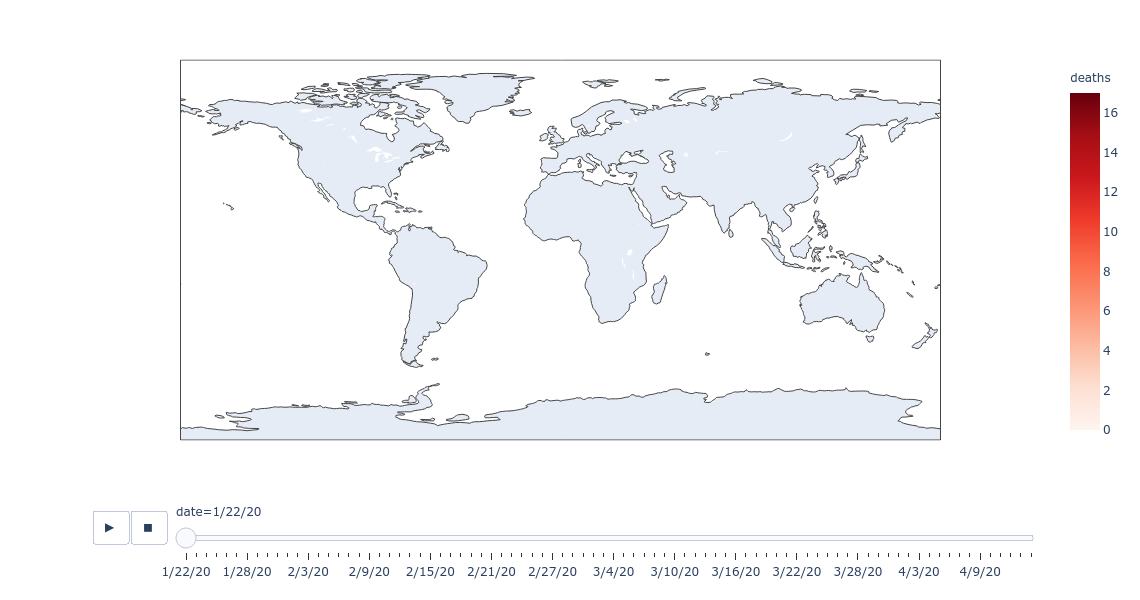

In [109]:
fig = px.scatter_geo(data_frame=deaths_global_time_series, locations='Country',
                     locationmode='country names', color='deaths',
                     hover_name='deaths', animation_frame='date', size='deaths',
                     color_continuous_scale=px.colors.sequential.Reds,
                     width=1000, height=600)
fig.show()

In [110]:
with open('assets/deaths_choropleth_map.html', 'w') as html_file:
    html_file.write(plotly.offline.plot(figure_or_data=fig, output_type='div', include_plotlyjs='cdn', auto_play=False))

In [137]:
def get_daily_deaths(deaths_columns):
    number_of_days = len(deaths_columns)
    daily_deaths = deaths_columns[0]
    diff = np.absolute(deaths_columns[1:number_of_days] - deaths_columns[0:number_of_days - 1])
    daily_deaths = np.append(daily_deaths, diff)
    return daily_deaths

In [138]:
def get_daily_deaths_df(df, country_name):
    new_df = df[df['Country'] == country_name]
    new_df['date'] = pd.to_datetime(new_df['date'], utc=False)
    new_df.sort_values(by='date', inplace=True)
    country_daily_deaths = get_daily_deaths(new_df['deaths'].values)
    new_df['daily_deaths'] = country_daily_deaths
    return new_df

In [150]:
most_affected_countries_names

array(['US', 'Italy', 'Spain', 'France', 'United Kingdom', 'Iran',
       'Belgium', 'China', 'Germany', 'Netherlands'], dtype=object)

In [151]:
countries_daily_deaths = pd.concat([get_daily_deaths_df(most_deaths_time_series, country_name) for country_name in most_affected_countries_names])

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/resa

In [153]:
countries_daily_deaths.sort_values(by='date', inplace=True)

In [154]:
countries_daily_deaths.head()

date      Country  deaths  daily_deaths
171 2020-01-22           US       0             0
84  2020-01-22        Italy       0             0
36  2020-01-22        China      17            17
120 2020-01-22  Netherlands       0             0
65  2020-01-22      Germany       0             0

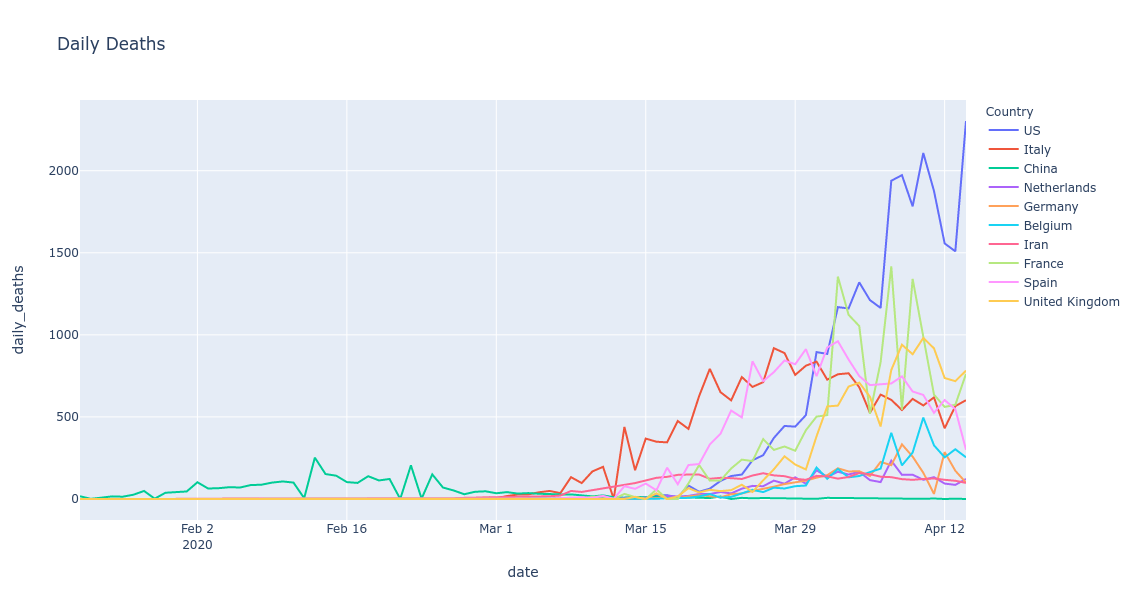

In [178]:
fig = px.line(data_frame=countries_daily_deaths, x='date', y='daily_deaths', color='Country',
              line_group='Country', title='Daily Deaths', height=600)
fig.show()

In [179]:
bar_chart_data = [go.Bar(name=country_name,
        x=countries_daily_deaths[countries_daily_deaths['Country'] == country_name]['date'],
        y=countries_daily_deaths[countries_daily_deaths['Country'] == country_name]['daily_deaths'])
 for country_name in most_affected_countries_names]

In [186]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=5, cols=2)

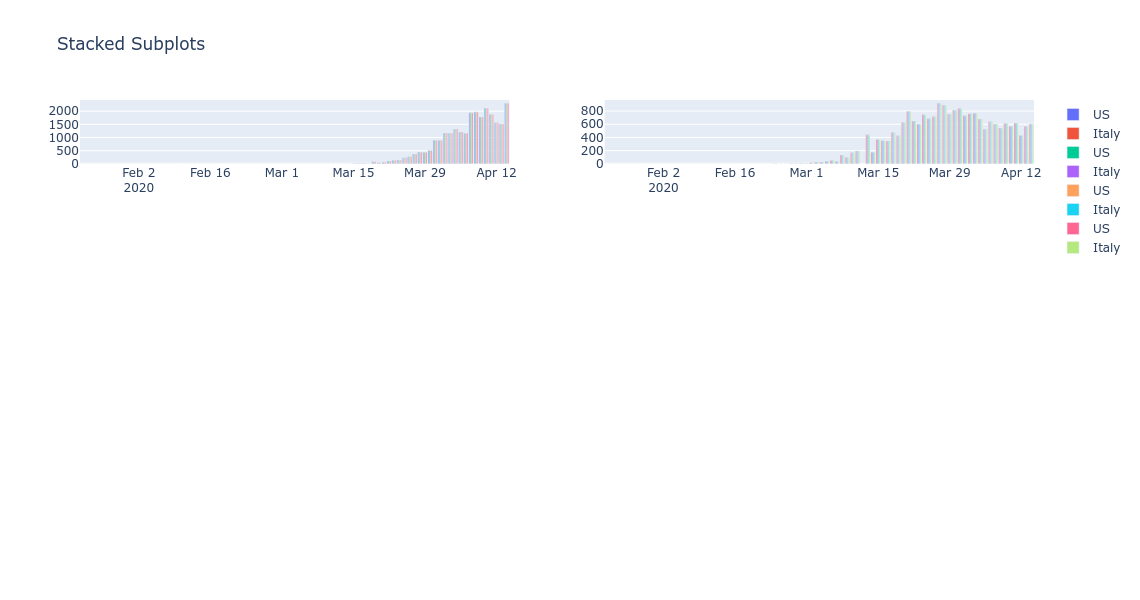

In [190]:
fig.add_trace(bar_chart_data[0], row=1, col=1)
fig.add_trace(bar_chart_data[1], row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="Stacked Subplots")
fig.show()

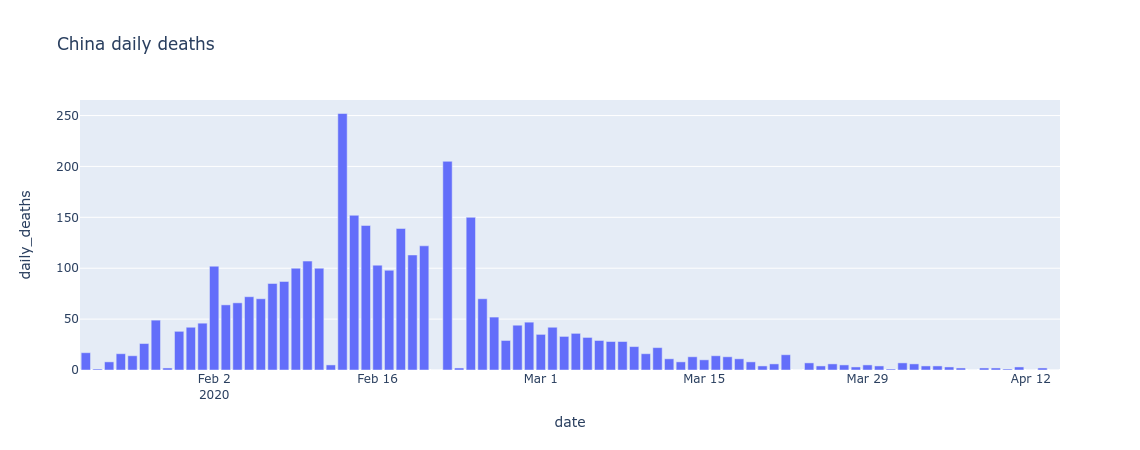

In [193]:
px.bar(data_frame=countries_daily_deaths[countries_daily_deaths['Country'] == 'China'],
      x = 'date', y='daily_deaths', title='China daily deaths')